In [56]:
# Import dependencies
import pandas as pd
import numpy as np
import plotly.express as px # new library
import seaborn as sns # new library
import matplotlib.pyplot as plt
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from pathlib import Path

In [57]:
# constants
DATABASE_PATH = Path("clean_data", "ev_wa.sqlite")

In [58]:
# Create a connection that can talk to the database and read data
conn = create_engine(f"sqlite:///{DATABASE_PATH}").connect()
Ev_data_df = pd.read_sql('EV_DATA', conn)
Ev_data_df.isnull().sum()

VIN                      0
County                   0
City                     0
State                    0
Postal Code              0
Model Year               0
Make                     0
Model                    0
Electric Vehicle Type    0
CAFV Eligibility         0
Electric Range           0
Vehicle Location         5
Electric Utility         0
dtype: int64

In [59]:
# Remove duplicate rows in the dataset
df = Ev_data_df.drop_duplicates()  
# Ensures that only unique rows are retained, removing any redundant duplicate records.

# Handle missing values by dropping rows with NaN values
df = df.dropna()  
# Alternatively, you can use df.fillna(value) to replace missing values with a specified value.

# Print the shape of the cleaned dataset (number of rows and columns) to verify changes
print(df.shape)

# Display the first few rows of the cleaned dataset to inspect the results
df.head()

(128691, 13)


,VIN,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,CAFV Eligibility,Electric Range,Vehicle Location,Electric Utility
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible ...,42,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC ...
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,98312,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible ...,151,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC ...
2,5YJ3E1EA4L,King,Seattle,WA,98101,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible ...,266,POINT (-122.3340795 47.6099315),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA) ...
3,1N4AZ0CP8E,King,Seattle,WA,98125,2014,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible ...,84,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA) ...
4,1G1FX6S00H,Thurston,Yelm,WA,98597,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible ...,238,POINT (-122.5715761 46.9095798),PUGET SOUND ENERGY INC ...


In [60]:
# Group by 'Model Year' and count the number of vehicles
annual_trends = df.groupby('Model Year').size()

# Convert to a DataFrame for tabular display
annual_trends_table = annual_trends.reset_index()
annual_trends_table.columns = ['Model Year', 'Vehicle Count']

# Display styled table
annual_trends_table.style.set_table_styles(
    [{'selector': 'th', 'props': [('font-weight', 'bold'), ('background-color', '#f0f0f0')]}]
).set_properties(**{'text-align': 'center', 'border': '1px solid black'})

,Model Year,Vehicle Count
0,1997,1
1,1999,4
2,2000,7
3,2002,2
4,2003,1
5,2008,22
6,2010,24
7,2011,616
8,2012,1444
9,2013,3610


## What are the average EV population trends in Washington over the last 10 years?

In [61]:
# Aggregate the data by Model Year
yearly_registrations = filtered_data.groupby('Model Year').sum()

# Filter for the last 10 years 
#Convert the index to strings (if you want to work with string values):
filtered_data = annual_trends[(annual_trends.index.astype(str) > '2013')]

# Average Registeration for the last 10 years

In [62]:
# Calculate the average for the last 10 years
average_registrations = round(filtered_data.mean(),2)
print(f"Average EV registrations over the last 10 years: {average_registrations}")

Average EV registrations over the last 10 years: 12296.0


## What does the progression of EV adoption look like over time?

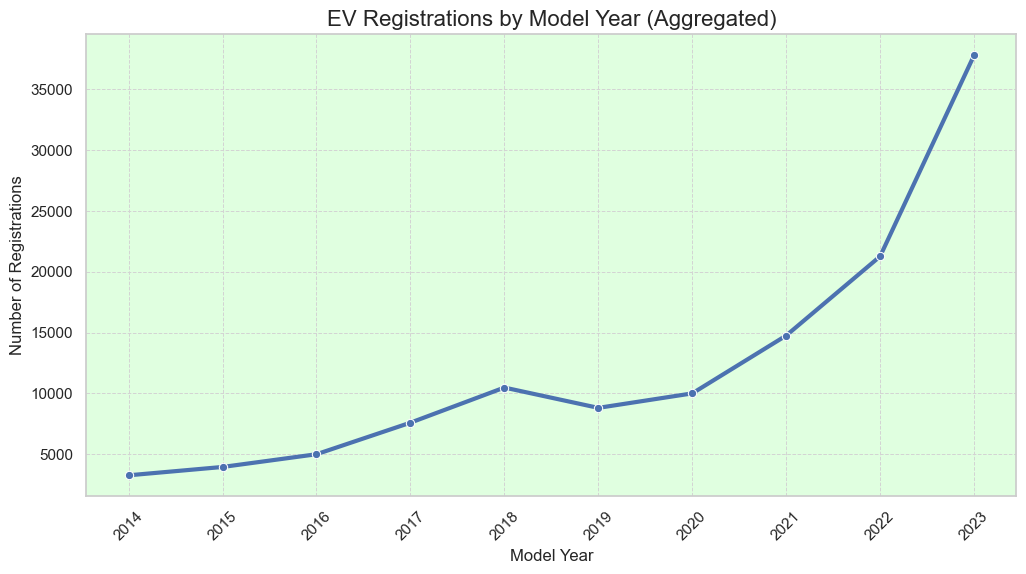

,Model Year,Registrations
0,2014,3268
1,2015,3954
2,2016,5000
3,2017,7595
4,2018,10484
5,2019,8814
6,2020,10004
7,2021,14760
8,2022,21275
9,2023,37806


In [63]:
# Convert to DataFrame for plotting 
yearly_registrations = yearly_registrations.reset_index(name='Registrations')

# Group the data by 'Model Year' and calculate the total registrations for each year
yearly_registrations = filtered_data.groupby('Model Year').sum()

# Reset the index to convert the grouped data into a DataFrame for plotting
yearly_registrations = yearly_registrations.reset_index(name='Registrations')

# Set the style for the Seaborn plot and create a new figure with specified dimensions
sns.set(style="whitegrid")  # Use a clean grid style for the plot
plt.figure(figsize=(12, 6))  # Set the figure size for better visibility

# Set the background color of the plot to a pale green
plt.gca().set_facecolor('#e0ffe0')  # Adds a light green background for aesthetic purposes

# Create a line plot to visualize yearly EV registrations
sns.lineplot(
    data=yearly_registrations,  # Data to plot
    x='Model Year',  # X-axis represents the model years
    y='Registrations',  # Y-axis represents the total registrations
    marker='o',  # Add circular markers to highlight individual data points
    linewidth=3  # Set the thickness of the line
)
# Add a title and axis labels to provide context to the plot
plt.title('EV Registrations by Model Year (Aggregated)', fontsize=16)  # Plot title
plt.xlabel('Model Year', fontsize=12)  # X-axis label
plt.ylabel('Number of Registrations', fontsize=12)  # Y-axis label

# Rotate the x-axis labels for better readability
plt.xticks(yearly_registrations['Model Year'], rotation=45)

# Add a grid with a light gray color and dashed lines for better readability
plt.grid(color='lightgray', linestyle='--', linewidth=0.7)

# Save the plot as a PNG file
plt.savefig("Ev_Register(Line).png")

# Display the line plot
plt.show()

# Display the DataFrame to show the exact registration numbers for each model year
display(yearly_registrations)

# Analysis: Steady Growth (2014–2023):
EV registrations increased from 3,268 in 2014 to 37,806 in 2023, demonstrating rapid growth as the market transitioned from early adoption to mainstream adoption. During the early adoption phase from 2014 to 2016, growth was slow at 53% over two years, hindered by limited EV models, high costs, and infrastructure gaps. This period was followed by an acceleration phase in 2017–2018, where registrations surged by 38%, driven by government subsidies, the availability of more affordable EVs, and the expansion of charging networks. However, growth slowed to a modest 13.5% between 2019 and 2020, largely due to the disruptions caused by the COVID-19 pandemic and economic uncertainties. The market rebounded strongly in the 2021–2023 period, with registrations soaring by over 150% to reach 37,806 in 2023. This boom was fueled by robust policy support, rising fuel costs that increased consumer interest in EVs, and maturing EV technology, which enhanced affordability and performance.

## Which year saw the greatest rise and the lowest rise in EV adoption?

In [64]:
# Find the year with the highest number of registrations
max_year = filtered_data.idxmax()  # Returns the index (year) with the maximum value

# Find the year with the lowest number of registrations
min_year = filtered_data.idxmin()  # Returns the index (year) with the minimum value

# Print the results
print(f"Year with highest registrations: {max_year}")  # Displays the year with the most registrations
print(f"Year with lowest registrations: {min_year}")  # Displays the year with the fewest registrations

Year with highest registrations: 2023
Year with lowest registrations: 2014


## What is the distribution of two types of EVs: battery electric vehicles 
## (BEVs &  plug-in hybrid electric vehicles (PHEVs?)

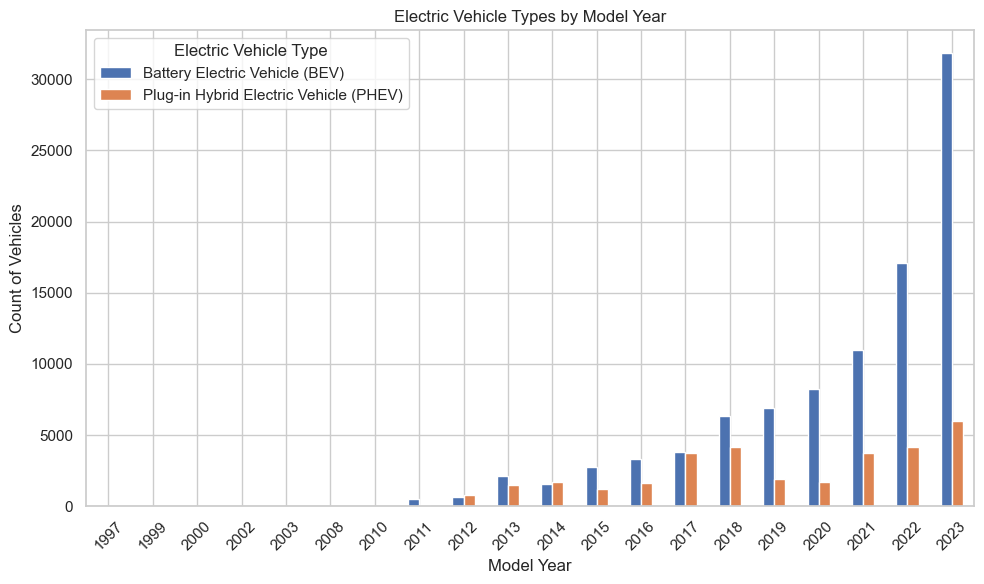

In [65]:
# Group the data by 'Model Year' and 'Electric Vehicle Type' and count occurrences
ev_counts = df.groupby(['Model Year', 'Electric Vehicle Type']).size().unstack(fill_value=0)

# Plot the data as a grouped bar chart
ev_counts.plot(kind='bar', figsize=(10, 6))  # Generate a bar chart, setting figure size for readability

# Add a title to the plot for context
plt.title('Electric Vehicle Types by Model Year')  # Indicates what the chart represents

# Label the x-axis and y-axis for clarity
plt.xlabel('Model Year')  # X-axis represents model years
plt.ylabel('Count of Vehicles')  # Y-axis represents the number of vehicles for each EV type

# Rotate the x-axis labels for better readability, especially for long years or dense data
plt.xticks(rotation=45)

# Add a legend to indicate what each color represents (the different EV types)
plt.legend(title='Electric Vehicle Type')

# Adjust layout to prevent overlapping elements (e.g., labels, title, bars)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig("EV_Type(Bar).png")
# Display the plot
plt.show()


# Analysis: 
The chart highlights the evolution of electric vehicle types across model years, showing steady growth in EV adoption over time. Early years exhibit lower counts, likely due to limited models and technology, while later years reflect a surge driven by increased availability, improved technology, and supportive policies. Battery Electric Vehicles (BEVs) dominate in recent years, indicating a shift toward fully electric options, while Plug-in Hybrid Electric Vehicles (PHEVs) may show slower growth or decline as BEVs become more affordable and offer greater range. Peaks in certain years likely correlate with popular EV launches and policy incentives, while any dips might reflect external factors like economic slowdowns or supply chain issues.

# Count the number of each EV type per model year (dot and heat map)

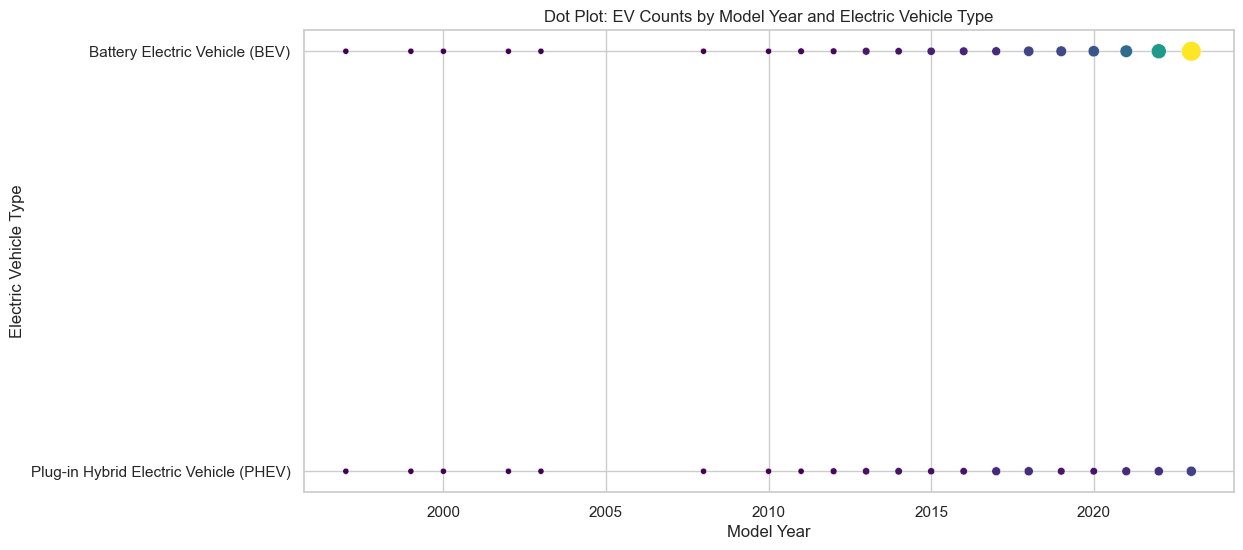

In [66]:
# Group the data by 'Model Year' and 'Electric Vehicle Type', then count occurrences
ev_counts = df.groupby(['Model Year', 'Electric Vehicle Type']).size().unstack(fill_value=0)  
# Creates a pivot table with 'Model Year' as rows and 'Electric Vehicle Type' as columns, filling missing values with 0.
plt.figure(figsize=(12, 6))  # Set the figure size for clarity

# Melt the data for use in a scatterplot (long-form data needed for seaborn scatterplot)
sns.scatterplot(
    data=ev_counts.reset_index().melt(id_vars=['Model Year'], value_name='Count'),  # Reshape data for plotting
    x='Model Year',  # X-axis is the model year
    y='Electric Vehicle Type',  # Y-axis is the EV type
    size='Count',  # The size of the dots corresponds to the count of EVs
    hue='Count',  # The color of the dots corresponds to the count of EVs
    sizes=(20, 200),  # Adjust the size range of the dots for better visibility
    palette="viridis",  # Use the 'viridis' color palette for a gradient effect
    legend=False  # Disable the legend for simplicity
)
# Add plot title and axis labels for better interpretation
plt.title('Dot Plot: EV Counts by Model Year and Electric Vehicle Type')  # Title of the plot
plt.xlabel('Model Year')  # Label for the x-axis
plt.ylabel('Electric Vehicle Type')  # Label for the y-axis

# Save the plot as a PNG file
plt.savefig("Ev_Count(Dot).png")
# Display the plot
plt.show()

# Analysis:
The dot plot shows the distribution and growth of EV types across model years, with larger and darker dots for recent years highlighting the increasing adoption of certain types, such as BEVs. Steady or growing dot sizes indicate consistent production and rising consumer preference, while gaps or smaller dots suggest declining interest in specific types, like PHEVs. The visual emphasizes the market's evolution, with a clear shift toward fully electric vehicles as technology, infrastructure, and policies favor zero-emission options.

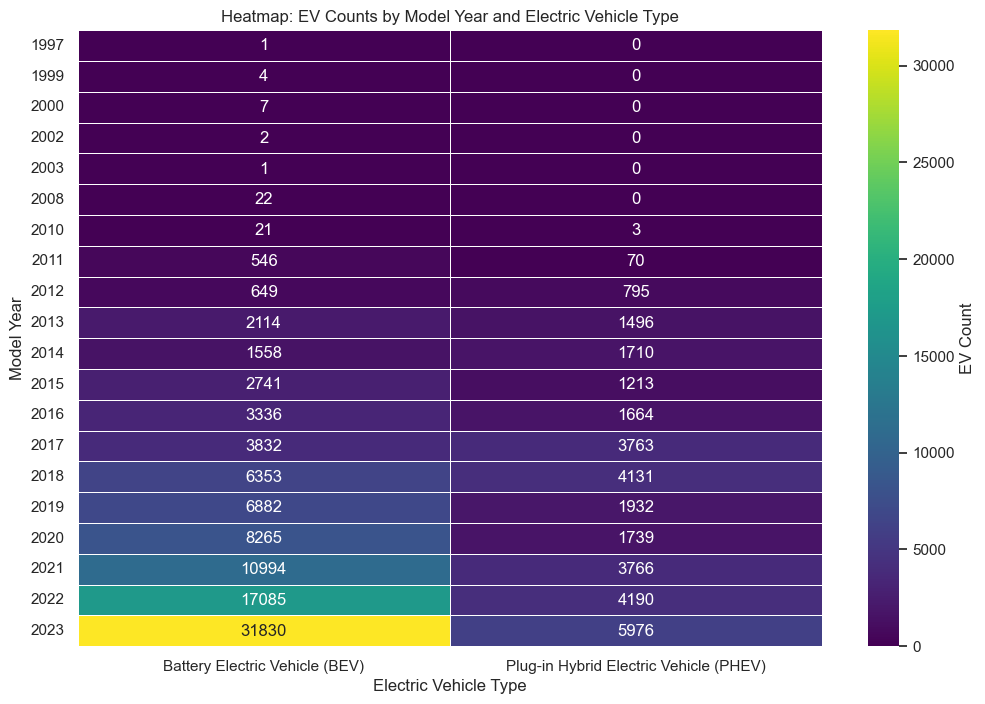

In [67]:
# Create a figure with a specified size for the heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size for better visibility

# Use Seaborn's heatmap to visualize the counts of EV types by model year
sns.heatmap(
    ev_counts,  # The pivoted DataFrame (e.g., counts of EV types for each model year)
    annot=True,  # Annotate each cell with the count value
    fmt='d',  # Format the annotations as integers
    cmap='viridis',  # Use the 'viridis' color map for a gradient effect
    linewidths=0.5,  # Add thin lines between cells for better readability
    cbar_kws={'label': 'EV Count'}  # Add a label to the color bar for context
)
# Add a title to the heatmap for context
plt.title('Heatmap: EV Counts by Model Year and Electric Vehicle Type')  # Indicates the purpose of the heatmap

# Label the x-axis to specify the column as EV types
plt.xlabel('Electric Vehicle Type')

# Label the y-axis to specify the column as Model Year
plt.ylabel('Model Year')
# Save the plot as a PNG file
plt.savefig("Ev_count(Heat).png")
# Display the heatmap
plt.show()

# Analysis of the Heatmap
The heatmap effectively visualizes the distribution of EV counts across model years and vehicle types, with color intensity reflecting the number of vehicles. Brighter or darker areas indicate higher counts, showcasing the dominance of certain EV types in specific years. Over time, increasing intensity highlights the growing adoption of electric vehicles, particularly for popular types like BEVs. Conversely, areas with low intensity or missing data suggest limited production or declining interest in specific types. The heatmap provides a clear and intuitive view of how the market evolved, with newer model years seeing more significant and diverse EV adoption.

## Geographic Hotspots
## Which counties in Washington are the most densely populated with EVs?

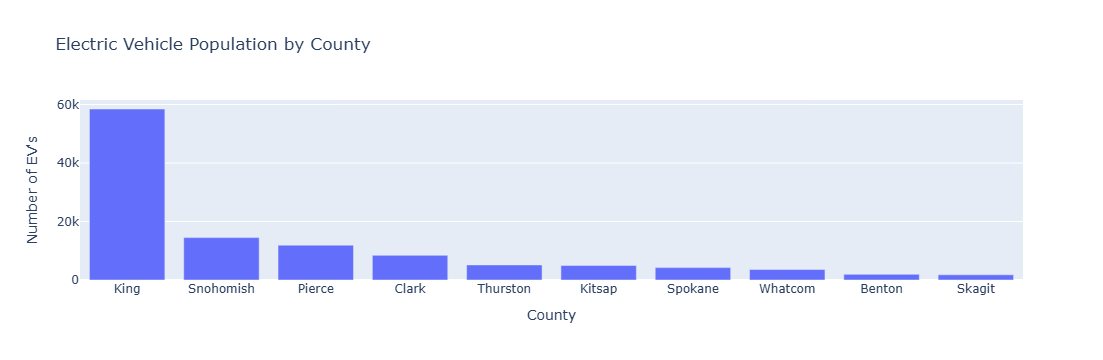

In [68]:
# Group by 'County', count 'City', and sort by the 'City' count in descending order
Counties = df.groupby('County').count().sort_values(by='City', ascending=False)['City'].index
values = df.groupby('County').count().sort_values(by='City', ascending=False)['City'].values

# Create the bar plot using Plotly Express
px.bar(x=list(Counties)[:10],y=values[:10], labels={'x':"County", 'y':"Number of EV's"}, title = 'Electric Vehicle Population by County')

# Analysis:
The bar plot showcases the geographic hotspots for EVs in Washington, highlighting the counties with the highest EV concentrations. Urban or suburban counties, such as King County, are likely to dominate due to higher population densities, better charging infrastructure, and increased EV awareness. These areas often have the socioeconomic conditions that favor EV adoption, including incentives, proximity to dealerships, and greater availability of charging stations. Rural counties are less represented, likely due to lower population densities and limited infrastructure.

### EV Types and Popularity
### What is the distribution of two types of EVs: battery electric vehicles (BEVs) and plug-in hybrid electric vehicles (PHEVs)?

C:\Users\riffa\AppData\Local\Temp\ipykernel_25768\2337002728.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




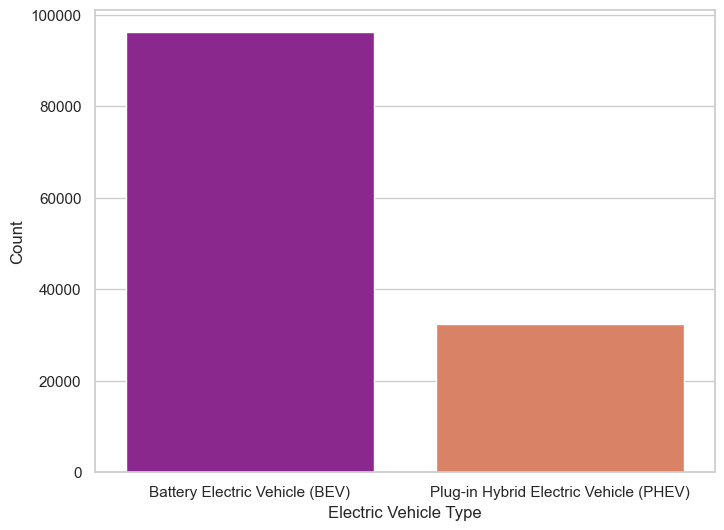

In [69]:
# Get the value counts for the 'Electric Vehicle Type' column and retrieve the top 2 most frequent types
value_counts = df['Electric Vehicle Type'].value_counts().head(2)  # Get top 2 EV types and their counts

# Set up the figure for the bar plot
plt.figure(figsize=(8, 6))  # Adjust the size of the figure for better visibility

# Create a bar plot using Seaborn to visualize the counts of the top 2 EV types
sns.barplot(x=value_counts.index, y=value_counts.values, palette='plasma')  # Use the 'plasma' color palette for styling

# Add labels for the x-axis and y-axis to provide context
plt.xlabel('Electric Vehicle Type')  # Label to specify the EV types (e.g., BEVs, PHEVs)
plt.ylabel('Count')  # Label to specify the number of vehicles for each type
# Save the plot as a PNG file
plt.savefig("Ev_Type(Bar2).png")
# Display the bar plot
plt.show()  # Render the plot on the screen

# Analysis: 
The bar plot highlights the two most common electric vehicle types in the dataset. The x-axis represents the EV types, while the y-axis indicates the count of each type. A significant difference in bar heights reflects the relative popularity of the top two types. For example, Battery Electric Vehicles (BEVs) might dominate due to their zero-emission nature and increasing range, while Plug-in Hybrid Electric Vehicles (PHEVs) could follow, catering to consumers transitioning to EVs but seeking flexibility with fuel. This visualization emphasizes consumer preference trends and the market share of different EV technologies.

## The top 2 most frequent values from the 'Electric Vehicle Type' 

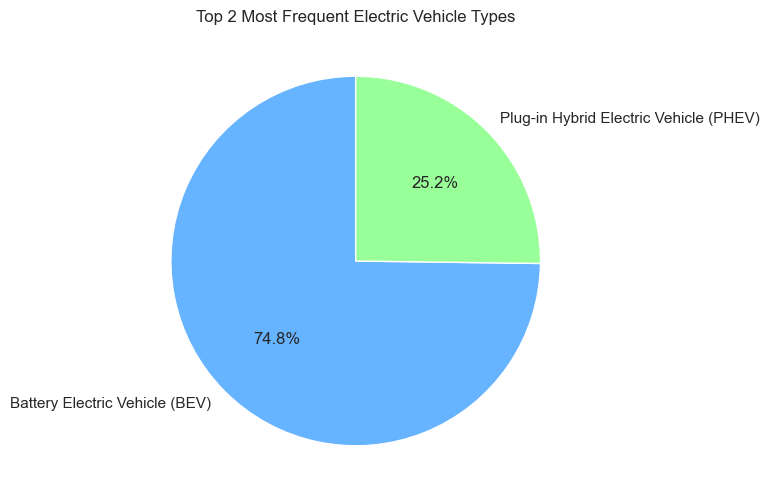

In [70]:
# Get the top 2 most frequent values from the 'Electric Vehicle Type' column
value_counts = df['Electric Vehicle Type'].value_counts().head(2)

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])

# Set title
plt.title('Top 2 Most Frequent Electric Vehicle Types')

# Save the plot as a PNG file
plt.savefig("Ev_Type(Pie).png")
# Display the pie chart
plt.show()

## Analysis of the Pie Chart
The pie chart provides a clear visualization of the proportion of the two most frequent electric vehicle types in the dataset. Each slice represents the percentage of vehicles belonging to a specific type, such as Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs). A larger slice for one type indicates its dominance in the market, reflecting consumer preference for that technology. For instance, if BEVs make up 70% or more, it highlights a strong shift toward fully electric options, likely due to advancements in range and infrastructure. The smaller slice might show transitional options like PHEVs, appealing to those not yet ready for fully electric vehicles. This chart emphasizes the market split between the top EV types.

### Which EV Make are the most popular? 

C:\Users\riffa\AppData\Local\Temp\ipykernel_25768\2107251088.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




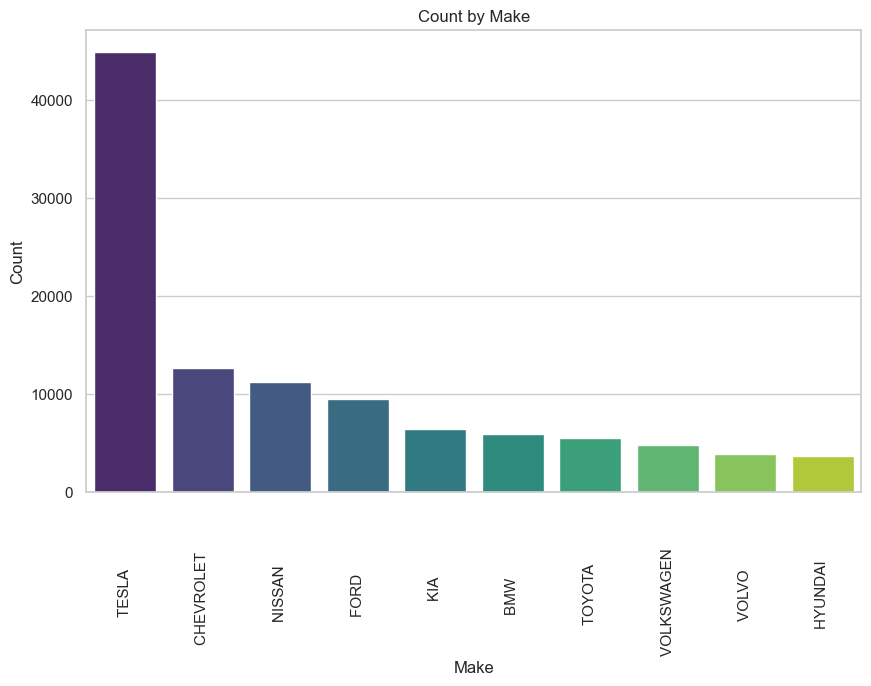

In [71]:
# Group the data by 'Make', count the number of registrations in 'City', and sort in descending order
Companies = df.groupby('Make').count().sort_values(by='City', ascending=False)['City'].index
values = df.groupby('Make').count().sort_values(by='City', ascending=False)['City'].values

# Create the bar plot
plt.figure(figsize=(10, 6))  # Set the figure size for a clear and proportional visualization

# Use Seaborn to create a bar plot for the top 10 EV makes, applying the 'viridis' palette for vibrant colors
sns.barplot(x=list(Companies)[:10], y=values[:10], palette='viridis')

# Add labels to the x-axis and y-axis
plt.xlabel('Make')  # Label to specify that the x-axis represents EV manufacturers
plt.ylabel('Count')  # Label to specify that the y-axis represents the count of registrations

# Add a title to describe the purpose of the plot
plt.title('Count by Make')  # Title explaining that it shows the count of registrations by EV make

# Rotate x-axis labels for better readability, especially for longer manufacturer names
plt.xticks(rotation=90)
# Save the plot as a PNG file
plt.savefig("Ev_Make(Bar).png")
# Display the plot
plt.show()  # Render the bar plot

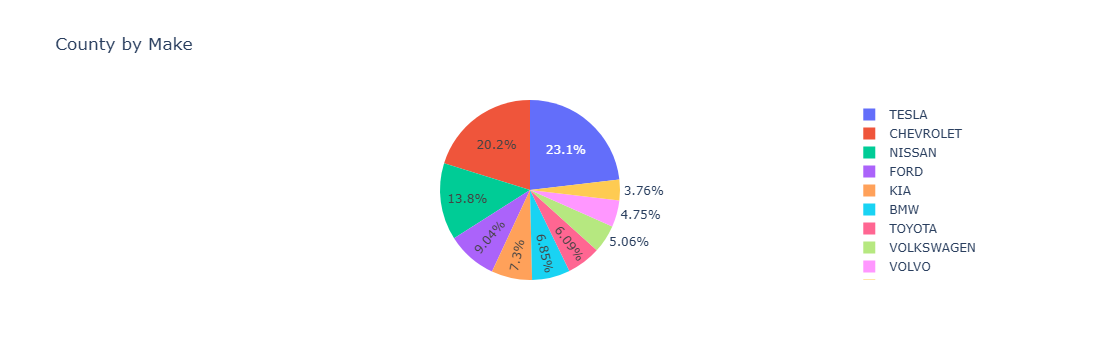

In [75]:
# Create a pie chart using Plotly Express

px.pie(names=list(Companies)[:10], values=values[:10], title= 'County by Make')

## Analysis:
The bar plot highlights the top 10 most popular EV makes, with Tesla likely leading due to its innovation and widespread infrastructure. Other makes like Nissan and Chevrolet follow, reflecting their affordability and early market entry. The steep decline among lower-ranked makes shows market dominance by a few key players.

## The percentage of top 10 make for battery electric vehicles (BEVs) and plug-in hybrid electric vehicles (PHEVs)

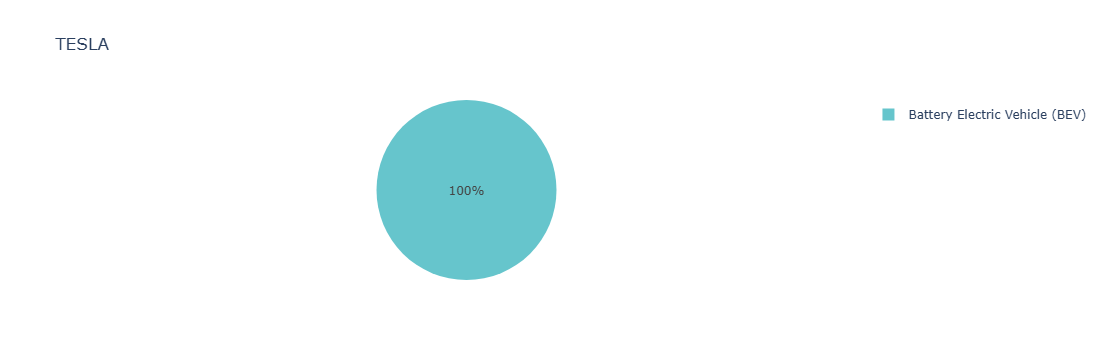

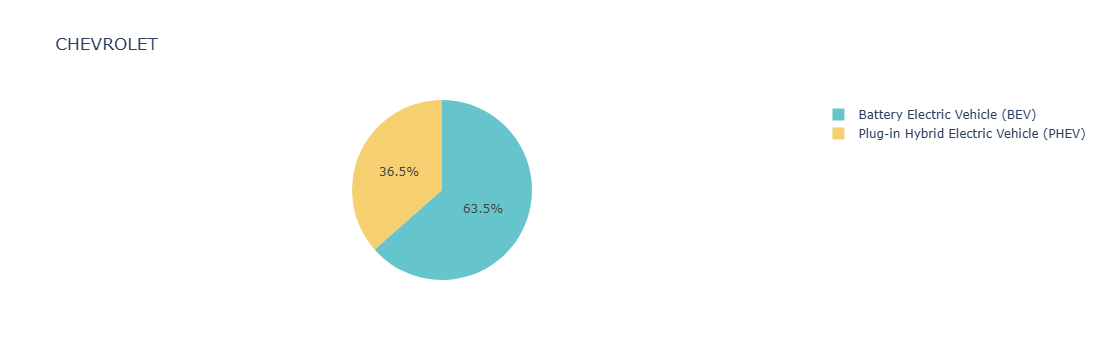

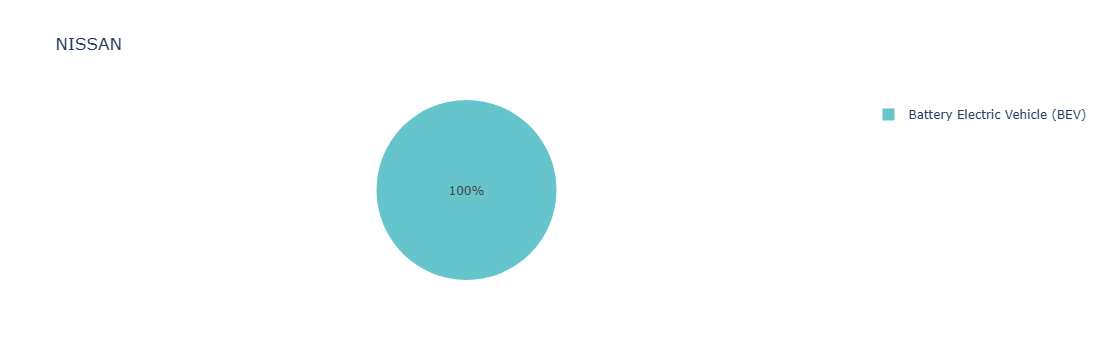

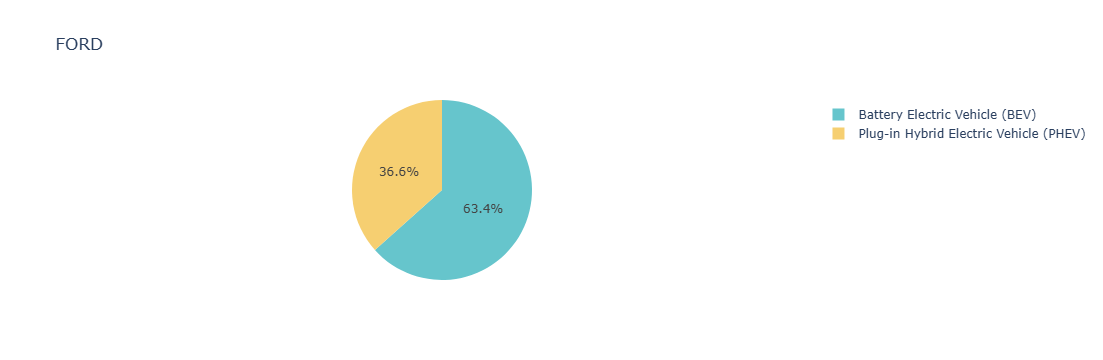

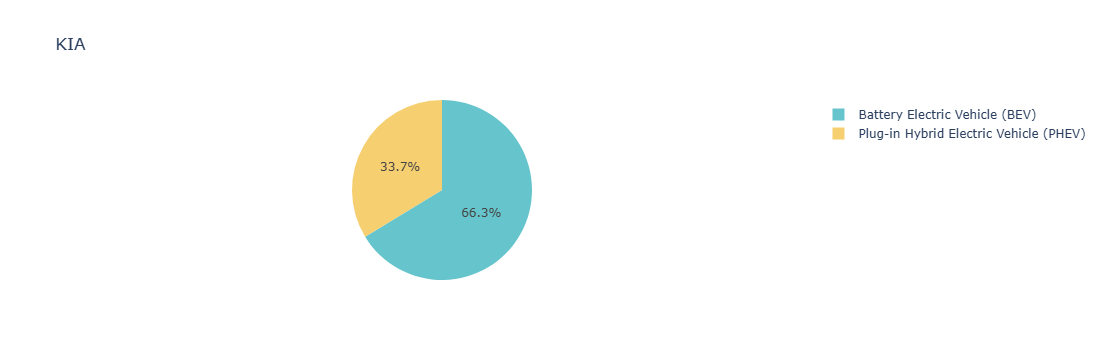

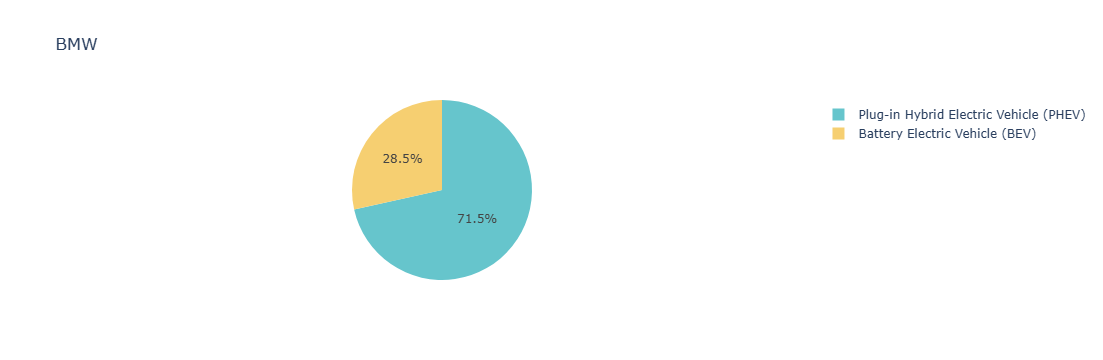

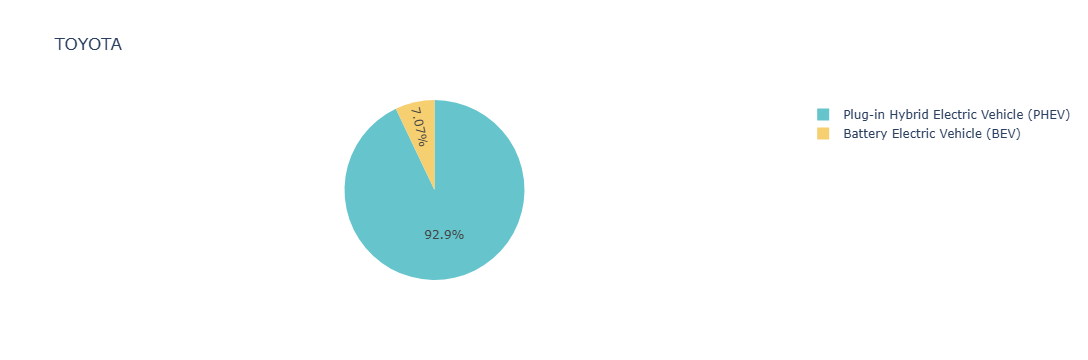

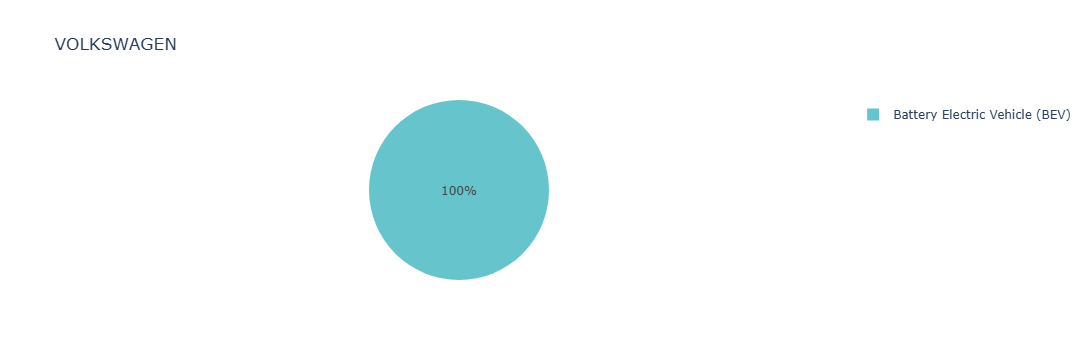

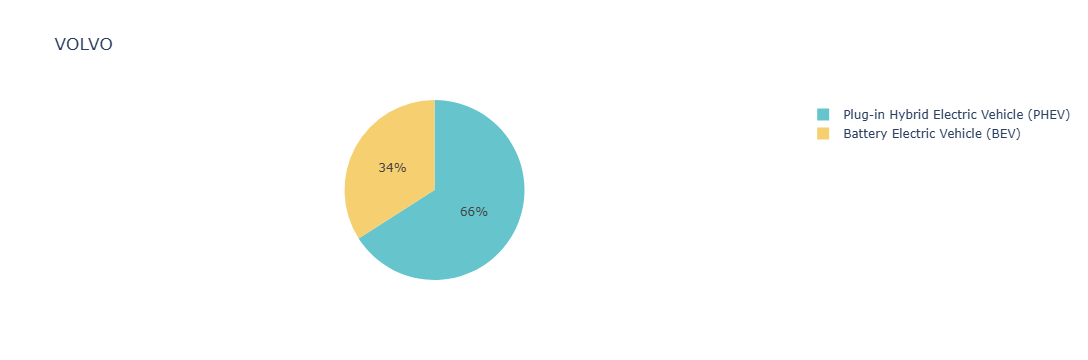

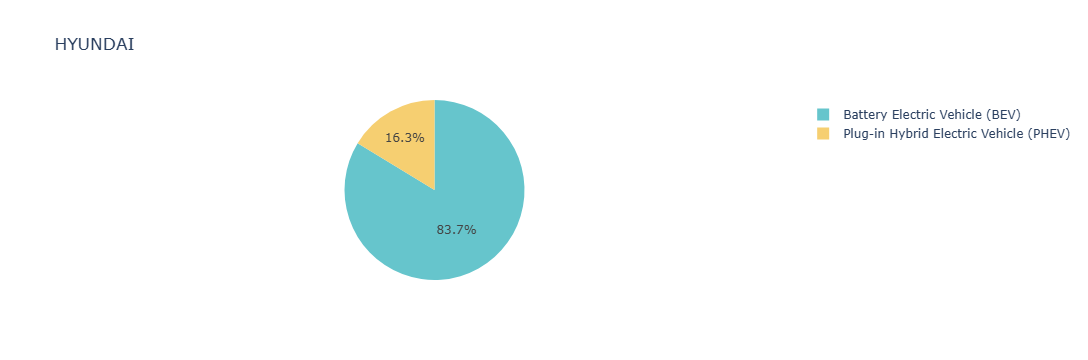

In [72]:
# Group the data by 'Make' and sort by the count of registrations (in the 'City' column) in descending order
Companies = df.groupby('Make').count().sort_values(by='City', ascending=False)['City'].index

# Extract the top 10 EV manufacturers
top_10_makes = list(Companies)[:10]

# Iterate through the top 10 makes
for index, i in enumerate(top_10_makes):
    # Filter the data for the current manufacturer
    mydata = df[df['Make'] == i]
    
    # Group the filtered data by 'Electric Vehicle Type' and count the registrations (in the 'City' column)
    evtypes = list(mydata.groupby('Electric Vehicle Type').count()['City'].index)  # List of EV types (e.g., BEVs, PHEVs)
    values = list(mydata.groupby('Electric Vehicle Type').count()['City'].values)  # Corresponding counts
    
    # Create a pie chart for the current manufacturer using Plotly Express
    fig = px.pie(
        names=evtypes,  # EV types (labels)
        values=values,  # Counts (sizes)
        title=str(i),  # Title of the pie chart, which is the manufacturer's name
        color_discrete_sequence=px.colors.qualitative.Pastel  # Pastel color palette for the pie chart
    )
    # Display the pie chart
    fig.show()

## Analysis: 
The pie charts show the distribution of Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) for the top 10 EV makes, highlighting differences in manufacturer strategies. Tesla, unsurprisingly, dominates with nearly 100% BEVs, reflecting its focus on fully electric vehicles, while brands like Toyota and Chevrolet show a mix of BEVs and PHEVs, catering to transitional consumer preferences. These charts emphasize the market's gradual shift toward BEVs, driven by infrastructure improvements and increasing demand for zero-emission vehicles.

## Which EV Models are the most popular?
----------------------------------------

C:\Users\riffa\AppData\Local\Temp\ipykernel_25768\2816895400.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




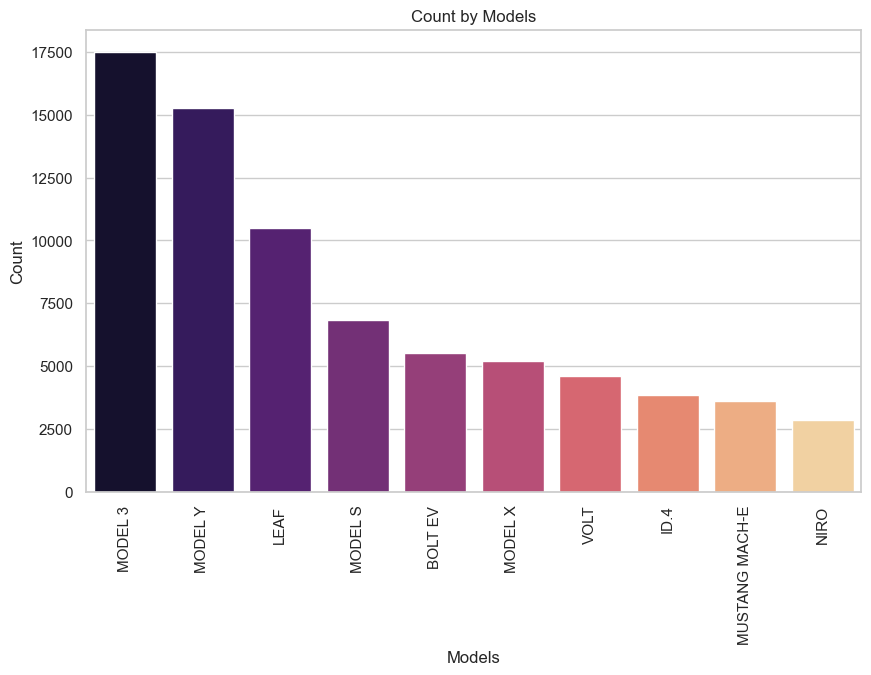

In [73]:
# Group the data by 'Model' and count the number of registrations (in the 'City' column), sorting in descending order
Models = df.groupby('Model').count().sort_values(by='City', ascending=False)['City'].index  # Get the top models
values = df.groupby('Model').count().sort_values(by='City', ascending=False)['City'].values  # Get their counts

# Create a bar plot to visualize the top 10 EV models
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility

# Use Seaborn to create the bar plot with the top 10 models and apply the 'magma' color palette for styling
sns.barplot(x=list(Models)[:10], y=values[:10], palette='magma')

# Add labels to the x-axis and y-axis for better context
plt.xlabel('Models')  # Label for the x-axis indicating the EV models
plt.ylabel('Count')  # Label for the y-axis indicating the number of registrations

# Add a title to explain what the plot represents
plt.title('Count by Models')  # Title indicating the bar plot shows counts of EVs by model

# Rotate the x-axis labels for better readability, especially if model names are long
plt.xticks(rotation=90)
# Save the plot as a PNG file
plt.savefig("Ev_Model(Bar).png")
# Render the bar plot to the screen
plt.show()

# Analysis:
The bar plot highlights the top 10 most popular EV models, with the x-axis representing specific models (e.g., Tesla Model 3, Nissan Leaf, Chevrolet Bolt) and the y-axis showing the count of registrations. Tesla models, such as the Model 3 and Model Y, are likely to dominate due to their widespread adoption, performance, and strong brand loyalty. Other popular models may include the Nissan Leaf and Chevrolet Bolt, known for affordability and early entry into the EV market. The plot demonstrates a steep concentration of registrations among a few standout models, emphasizing the role of flagship EVs in driving adoption.

# Most Sold Models by the Top 10 Companies

In [74]:
# Create a list of the top 10 companies (make)
top_10_companies = list(Companies)[:10]

# Create an empty dictionary to hold top models for each company
top_models = {}

# Loop through each company in the top 10
for company in top_10_companies:
    # Filter the DataFrame for the current company
    data = df[df['Make'] == company]
    
    # Group by 'Model' and count the occurrences of 'City' (or any other relevant column)
    data = data.groupby('Model').count().sort_values(by='City', ascending=False).index
    
    
# Print out the top models for each of the top 10 companies

    print(f"Top selling model for {company}:",data[0])

Top selling model for TESLA               : MODEL 3
Top selling model for CHEVROLET           : BOLT EV
Top selling model for NISSAN              : LEAF
Top selling model for FORD                : MUSTANG MACH-E
Top selling model for KIA                 : NIRO
Top selling model for BMW                 : I3
Top selling model for TOYOTA              : PRIUS PRIME
Top selling model for VOLKSWAGEN          : ID.4
Top selling model for VOLVO               : XC90
Top selling model for HYUNDAI             : IONIQ 5
